<a href="https://colab.research.google.com/github/enelaill/My_First_Test_Repo/blob/main/%D0%9B%D0%B0%D0%B1%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В таблице я сделал свой заголовок (Data, Первый, Второй). 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
data = pd.read_excel('Угольные_разрезы_1.xlsx')
#Второй пункт
print("Заголовок таблицы:")
print(data.columns)
print("Первые несколько строк:")
print(data.head())
print("Последние несколько строк:")
print(data.tail())


Заголовок таблицы:
Index(['Data', 'Первый', 'Второй'], dtype='object')
Первые несколько строк:
                 Data  Первый  Второй
0  01.01.2015 0:30:00  1463.0  1776.5
1  01.01.2015 1:00:00  1452.0  1765.5
2  01.01.2015 1:30:00  1391.5  1699.5
3  01.01.2015 2:00:00  1435.5  1749.0
4  01.01.2015 2:30:00  1435.5  1749.0
Последние несколько строк:
                      Data  Первый  Второй
68662  31.12.2018 21:30:00  1769.0  2232.0
68663  31.12.2018 22:00:00  1762.0  2220.0
68664  31.12.2018 22:30:00  1679.0  2148.0
68665  31.12.2018 23:00:00  1819.0  2253.0
68666  31.12.2018 23:30:00  1566.0  2035.0


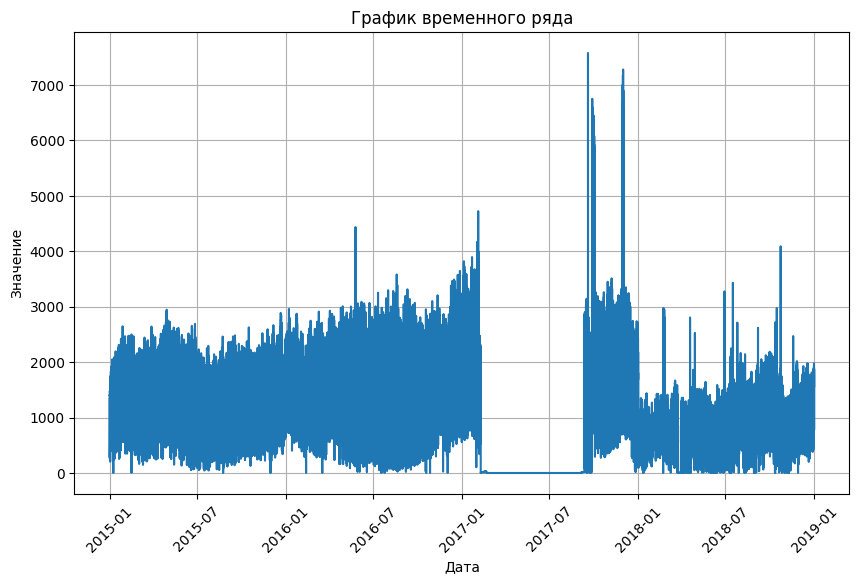

In [135]:
# Построение графиков временного ряда 
import pandas as pd
import matplotlib.pyplot as plt
# Создание DataFrame с данными
df = pd.read_excel('Угольные_разрезы_1.xlsx')
# Преобразование столбца 'Data' в формат datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y %H:%M:%S')
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Первый'])
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('график1.png')
plt.show()

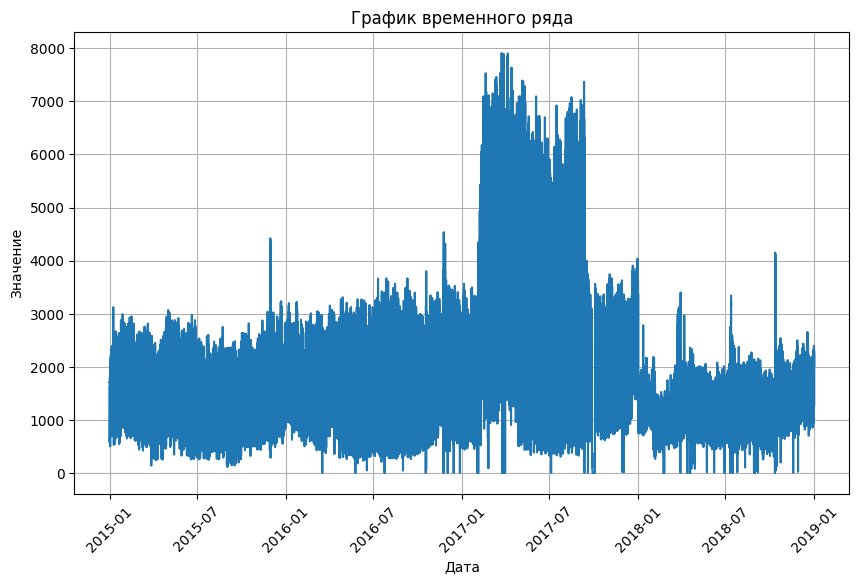

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
# Создание DataFrame с данными
df = pd.read_excel('Угольные_разрезы_1.xlsx')
# Преобразование столбца 'Data' в формат datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y %H:%M:%S')
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Второй'])
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('график2.png')
plt.show()


In [134]:
# Вариант 3
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
# Чтение данных из файла Excel
df = pd.read_excel('Угольные_разрезы_1.xlsx')
# Преобразование столбца 'Data' в формат datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y %H:%M:%S')
# Выбор данных за последние 5 суток
last_5_days = df[df['Data'] >= df['Data'].max() - pd.DateOffset(days=5)]
# Вычисление суммарного потребления
last_5_days['Сумма'] = last_5_days['Первый'] + last_5_days['Второй']
# Определение точек локального максимума
local_maxima = np.where((last_5_days['Сумма'] > last_5_days['Сумма'].shift(1)) & (last_5_days['Сумма'] > last_5_days['Сумма'].shift(-1)))
# Создание интерактивного графика
fig = go.Figure()
# Добавление линии суммарного потребления
fig.add_trace(go.Scatter(x=last_5_days['Data'], y=last_5_days['Сумма'], mode='lines', name='Суммарное потребление'))
# Добавление точек локального максимума
fig.add_trace(go.Scatter(x=last_5_days.iloc[local_maxima]['Data'], y=last_5_days.iloc[local_maxima]['Сумма'],
                         mode='markers', name='Точки локального максимума', marker=dict(color='red', size=8)))
# Настройка внешнего вида графика
fig.update_layout(title='График суммарного потребления разрезов за последние 5 суток',
                  xaxis_title='Дата', yaxis_title='Суммарное потребление')
# Отображение интерактивного графика
df.to_excel('данные.xlsx', index=False)
fig.show()


<ipython-input-134-aa8ad4f603f4>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

